In [1]:
import pandas as pd 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data)

In [4]:
df.head()
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.columns=iris.feature_names 

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df.drop(["sepal length (cm)" , "sepal width (cm)"] , axis="columns" , inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [9]:
df.size

300

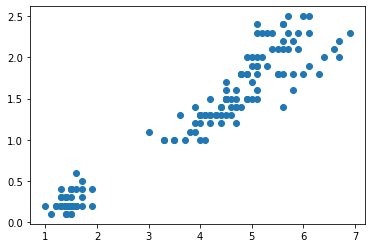

In [10]:
plt.scatter(df["petal length (cm)"], df["petal width (cm)"])

## Finding number of clusters using ELBOW PLOT MEHOD

In [11]:
from sklearn.cluster import KMeans

In [12]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

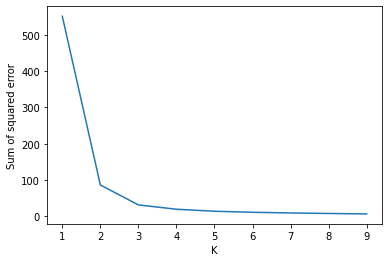

In [14]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## Training Model

In [16]:
km =  KMeans(n_clusters=3)

In [19]:
pred_y = km.fit_predict(df)
pred_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [20]:
km.cluster_centers_       # Cluster centers

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

### seperating all clusters into dataframe

In [22]:
df["cluster"] = pred_y # Appending cluster column into df
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [23]:
df_1 = df[df.cluster == 0]
df_2 = df[df.cluster == 1]
df_3 = df[df.cluster == 2]

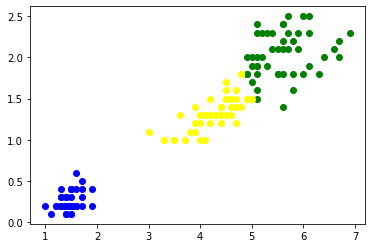

In [25]:
plt.scatter(df_1['petal length (cm)'],df_1['petal width (cm)'],color='blue')
plt.scatter(df_2['petal length (cm)'],df_2['petal width (cm)'],color='green')
plt.scatter(df_3['petal length (cm)'],df_3['petal width (cm)'],color='yellow')
plt.show()